In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

In [31]:
r = requests.get('https://www.hockey-reference.com/').text
tables = pd.read_html(r, header=0)
tables[0]

,Eastern,W,L,OL,PTS,RW,RgRec,RgPt%
0,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic,Atlantic
1,BOS*,65,12,5,135,54,54-12-16,.756
2,TOR*,50,21,11,111,42,42-21-19,.628
3,TBL*,46,30,6,98,38,38-30-14,.549
4,FLA*,42,32,8,92,36,36-32-14,.524
5,BUF,42,33,7,91,30,30-33-19,.482
6,OTT,39,35,8,86,31,31-35-16,.476
7,DET,35,37,10,80,28,28-37-17,.445
8,MTL,31,45,6,68,21,21-45-16,.354
9,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan,Metropolitan


In [39]:
# Split Atlantic and Metropolitan tables up
Atlantic = tables[0][1:9].reset_index(drop = True)
Atlantic.rename(columns={'Eastern': 'Team'}, inplace=True)
Atlantic

,Team,W,L,OL,PTS,RW,RgRec,RgPt%
0,BOS*,65,12,5,135,54,54-12-16,.756
1,TOR*,50,21,11,111,42,42-21-19,.628
2,TBL*,46,30,6,98,38,38-30-14,.549
3,FLA*,42,32,8,92,36,36-32-14,.524
4,BUF,42,33,7,91,30,30-33-19,.482
5,OTT,39,35,8,86,31,31-35-16,.476
6,DET,35,37,10,80,28,28-37-17,.445
7,MTL,31,45,6,68,21,21-45-16,.354


In [40]:
Metropolitan = tables[0][10:].reset_index(drop = True)
Metropolitan.rename(columns={'Eastern': 'Team'}, inplace=True)
Metropolitan

,Team,W,L,OL,PTS,RW,RgRec,RgPt%
0,CAR*,52,21,9,113,39,39-21-22,.610
1,NJD*,52,22,8,112,39,39-22-21,.604
2,NYR*,47,22,13,107,37,37-22-23,.591
3,NYI*,42,31,9,93,36,36-31-15,.530
4,PIT,40,31,11,91,31,31-31-20,.500
5,WSH,35,37,10,80,27,27-37-18,.439
6,PHI,31,38,13,75,26,26-38-18,.427
7,CBJ,25,48,9,59,15,15-48-19,.299


Text(0.5, 1.0, 'Points Scored by Atlantic Teams')

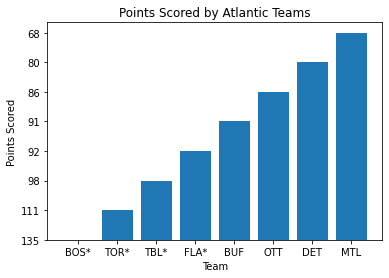

In [49]:
plt.bar(Atlantic.Team, Atlantic.PTS, bottom=0)
plt.xlabel('Team')
plt.ylabel('Points Scored')
plt.title('Points Scored by Atlantic Teams')

In [50]:
Atlantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    8 non-null      object
 1   W       8 non-null      object
 2   L       8 non-null      object
 3   OL      8 non-null      object
 4   PTS     8 non-null      object
 5   RW      8 non-null      object
 6   RgRec   8 non-null      object
 7   RgPt%   8 non-null      object
dtypes: object(8)
memory usage: 640.0+ bytes


In [51]:
# Converting object classes to integers and then the percentage column to a floating point value
columns_to_convert = ['W', 'L', 'OL', 'PTS', 'RW']
Atlantic[columns_to_convert] = Atlantic[columns_to_convert].astype(int)

Metropolitan[columns_to_convert] = Metropolitan[columns_to_convert].astype(int)

Atlantic['RgPt%'] = Atlantic['RgPt%'].astype(float)
Metropolitan['RgPt%'] = Metropolitan['RgPt%'].astype(float)

In [52]:
print(Atlantic.info())
print(Metropolitan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    8 non-null      object 
 1   W       8 non-null      int64  
 2   L       8 non-null      int64  
 3   OL      8 non-null      int64  
 4   PTS     8 non-null      int64  
 5   RW      8 non-null      int64  
 6   RgRec   8 non-null      object 
 7   RgPt%   8 non-null      float64
dtypes: float64(1), int64(5), object(2)
memory usage: 640.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    8 non-null      object 
 1   W       8 non-null      int64  
 2   L       8 non-null      int64  
 3   OL      8 non-null      int64  
 4   PTS     8 non-null      int64  
 5   RW      8 non-null      int64  
 6   RgRec   8 non-null      object 
 7   RgPt%   8 non-null  

Text(0.5, 1.0, 'Points Scored by Atlantic Teams')

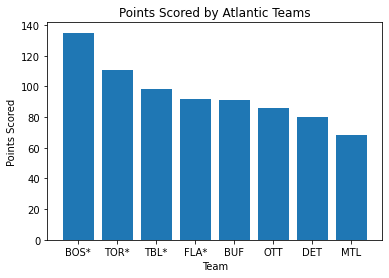

In [53]:
# Same bar chart
plt.bar(Atlantic.Team, Atlantic.PTS, bottom=0)
plt.xlabel('Team')
plt.ylabel('Points Scored')
plt.title('Points Scored by Atlantic Teams')

In [54]:
# Hockey reference - statistics
# Cap friendly - Salary data, including team salaries and caps

## 2022-2023 Free Agent Salaries

In [10]:
# Scrape 2022-2023 salary and bio information

url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2023/age/all/all/ufa/asc?stats-season=2023&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
# find <div class="r" style="margin:0 4px 0 0">Page 2 of 32</div>
# <div class="r" style="margin:0 4px 0 0">Page 1 of 11</div>
res = soup.find('div', class_='r', style='margin:0 4px 0 0')
pc = int(res.text.split(' ')[-1])

master = []
for page in range(1,pc+1):
    url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2023/age/all/all/ufa/asc?stats-season=2023&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats&pg={}'.format(page)
    table = pd.read_html(url)[0]
    master.append(table)

salary_2023 = pd.concat(master)
salary_2023['Year'] = 2023
salary_2023

,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,SIGNING,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,SALARY,BASE SALARY,S.BONUS,P.BONUS,Year
0,1. Johan Södergran,-,22,"Nov. 20, 1999",Sweden,205 lbs - 93 kg,"6'3"" - 191 cm",C,Left,165 - Round 6 - 2018 (LAK),...,ELC,UFANo QO,2022,"$791,667",1.0%,"$830,000","$750,000","$80,000",$0,2023
1,2. Lucas Elvenes,-,22,"Aug. 18, 1999",Sweden,174 lbs - 79 kg,"6'0"" - 183 cm",RW,Left,127 - Round 5 - 2017 (VGK),...,ELC,UFANo QO,2022,"$776,667",1.0%,"$750,000","$750,000",$0,"$110,000",2023
2,3. Alexey Lipanov,-,22,"Aug. 17, 1999",Russia,165 lbs - 75 kg,"6'0"" - 183 cm",C,Left,76 - Round 3 - 2017 (TBL),...,ELC,UFANo QO,2022,"$747,500",1.0%,"$750,000","$750,000",$0,"$82,500",2023
3,4. Nicholas Henry,-,22,"Jul. 4, 1999",Canada,190 lbs - 86 kg,"6'0"" - 183 cm",RW,Right,94 - Round 4 - 2017 (COL),...,ELC,UFANo QO,2022,"$798,333",1.0%,"$830,000","$750,000","$80,000",$0,2023
4,5. David Farrance,-,23,"Jun. 23, 1999",United States,189 lbs - 86 kg,"5'11"" - 180 cm",LD,Left,92 - Round 3 - 2017 (NSH),...,ELC,UFANo QO,2022,"$925,000",1.1%,"$925,000","$832,500","$92,500","$850,000",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,502. Jason Spezza,-,39,"Jun. 13, 1983",Canada,216 lbs - 98 kg,"6'3"" - 191 cm","C, RW",Right,2 - Round 1 - 2001 (OTT),...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0,2023
2,503. Andy Greene,-,39,"Oct. 30, 1982",United States,190 lbs - 86 kg,"5'11"" - 180 cm",LD/RD,Left,-,...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,"$250,000",2023
3,504. Craig Anderson,-,41,"May 21, 1981",United States,186 lbs - 84 kg,"6'2"" - 188 cm",G,Left,73 - Round 3 - 2001 (CHI),...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0,2023
4,505. Joe Thornton,-,42,"Jul. 2, 1979",Canada,220 lbs - 100 kg,"6'4"" - 193 cm","C, LW",Left,1 - Round 1 - 1997 (BOS),...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0,2023


In [11]:
salary_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 5
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PLAYER         506 non-null    object
 1   TEAM           506 non-null    object
 2   AGE            506 non-null    int64 
 3   DATE OF BIRTH  506 non-null    object
 4   COUNTRY        506 non-null    object
 5   WEIGHT         506 non-null    object
 6   HEIGHT         506 non-null    object
 7   POS            506 non-null    object
 8   HANDED         506 non-null    object
 9   DRAFTED        506 non-null    object
 10  SIGNING TEAM   506 non-null    object
 11  TYPE           506 non-null    object
 12  EXTENSION      139 non-null    object
 13  SIGNING DATE   506 non-null    object
 14  SIGNING AGE    506 non-null    int64 
 15  CLAUSE         40 non-null     object
 16  LENGTH         506 non-null    int64 
 17  SIGNING        506 non-null    object
 18  EXPIRY         506 non-null    o

In [9]:
# 2021-2022 scrape

url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2022/age/all/all/ufa/asc?stats-season=2022&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
# find <div class="r" style="margin:0 4px 0 0">Page 2 of 32</div>
# <div class="r" style="margin:0 4px 0 0">Page 1 of 11</div>
res = soup.find('div', class_='r', style='margin:0 4px 0 0')
pc = int(res.text.split(' ')[-1])

master = []
for page in range(1,pc+1):
    url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2023/age/all/all/ufa/asc?stats-season=2023&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats&pg={}'.format(page)
    table = pd.read_html(url)[0]
    master.append(table)

salary_2022 = pd.concat(master)
salary_2022['Year'] = 2022
salary_2022

,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,SIGNING,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,SALARY,BASE SALARY,S.BONUS,P.BONUS,Year
0,1. Johan Södergran,-,22,"Nov. 20, 1999",Sweden,205 lbs - 93 kg,"6'3"" - 191 cm",C,Left,165 - Round 6 - 2018 (LAK),...,ELC,UFANo QO,2022,"$791,667",1.0%,"$830,000","$750,000","$80,000",$0,2022
1,2. Lucas Elvenes,-,22,"Aug. 18, 1999",Sweden,174 lbs - 79 kg,"6'0"" - 183 cm",RW,Left,127 - Round 5 - 2017 (VGK),...,ELC,UFANo QO,2022,"$776,667",1.0%,"$750,000","$750,000",$0,"$110,000",2022
2,3. Alexey Lipanov,-,22,"Aug. 17, 1999",Russia,165 lbs - 75 kg,"6'0"" - 183 cm",C,Left,76 - Round 3 - 2017 (TBL),...,ELC,UFANo QO,2022,"$747,500",1.0%,"$750,000","$750,000",$0,"$82,500",2022
3,4. Nicholas Henry,-,22,"Jul. 4, 1999",Canada,190 lbs - 86 kg,"6'0"" - 183 cm",RW,Right,94 - Round 4 - 2017 (COL),...,ELC,UFANo QO,2022,"$798,333",1.0%,"$830,000","$750,000","$80,000",$0,2022
4,5. David Farrance,-,23,"Jun. 23, 1999",United States,189 lbs - 86 kg,"5'11"" - 180 cm",LD,Left,92 - Round 3 - 2017 (NSH),...,ELC,UFANo QO,2022,"$925,000",1.1%,"$925,000","$832,500","$92,500","$850,000",2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,496. Nate Thompson,-,37,"Oct. 5, 1984",United States,205 lbs - 93 kg,"6'1"" - 185 cm",C,Left,183 - Round 6 - 2003 (BOS),...,UFA,UFA,2022,"$800,000",1.0%,"$800,000","$800,000",$0,$0,2022
46,497. Ryan Kesler,-,37,"Aug. 31, 1984",United States,206 lbs - 93 kg,"6'2"" - 188 cm","C, RW",Right,23 - Round 1 - 2003 (VAN),...,UFA,UFA,2022,"$6,875,000",9.6%,"$6,675,000","$6,675,000",$0,$0,2022
47,498. Zach Parise,-,37,"Jul. 28, 1984",United States,195 lbs - 88 kg,"5'11"" - 180 cm",LW,Left,17 - Round 1 - 2003 (NJD),...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,"$750,000",2022
48,499. Joe Pavelski,DAL,37,"Jul. 11, 1984",United States,195 lbs - 88 kg,"5'11"" - 180 cm",RW,Right,205 - Round 7 - 2003 (SJS),...,UFA,UFA,2022,"$7,000,000",8.6%,"$8,000,000","$8,000,000",$0,$0,2022


In [12]:
salary_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 49
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PLAYER         500 non-null    object
 1   TEAM           500 non-null    object
 2   AGE            500 non-null    int64 
 3   DATE OF BIRTH  500 non-null    object
 4   COUNTRY        500 non-null    object
 5   WEIGHT         500 non-null    object
 6   HEIGHT         500 non-null    object
 7   POS            500 non-null    object
 8   HANDED         500 non-null    object
 9   DRAFTED        500 non-null    object
 10  SIGNING TEAM   500 non-null    object
 11  TYPE           500 non-null    object
 12  EXTENSION      136 non-null    object
 13  SIGNING DATE   500 non-null    object
 14  SIGNING AGE    500 non-null    int64 
 15  CLAUSE         39 non-null     object
 16  LENGTH         500 non-null    int64 
 17  SIGNING        500 non-null    object
 18  EXPIRY         500 non-null    

In [13]:
# 2020-2021 scrape

url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2021/age/all/all/ufa/asc?stats-season=2021&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
# find <div class="r" style="margin:0 4px 0 0">Page 2 of 32</div>
# <div class="r" style="margin:0 4px 0 0">Page 1 of 11</div>
res = soup.find('div', class_='r', style='margin:0 4px 0 0')
pc = int(res.text.split(' ')[-1])

master = []
for page in range(1,pc+1):
    url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2023/age/all/all/ufa/asc?stats-season=2023&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats&pg={}'.format(page)
    table = pd.read_html(url)[0]
    master.append(table)

salary_2021 = pd.concat(master)
salary_2021['Year'] = 2021
salary_2021

,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,SIGNING,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,SALARY,BASE SALARY,S.BONUS,P.BONUS,Year
0,1. Johan Södergran,-,22,"Nov. 20, 1999",Sweden,205 lbs - 93 kg,"6'3"" - 191 cm",C,Left,165 - Round 6 - 2018 (LAK),...,ELC,UFANo QO,2022,"$791,667",1.0%,"$830,000","$750,000","$80,000",$0,2021
1,2. Lucas Elvenes,-,22,"Aug. 18, 1999",Sweden,174 lbs - 79 kg,"6'0"" - 183 cm",RW,Left,127 - Round 5 - 2017 (VGK),...,ELC,UFANo QO,2022,"$776,667",1.0%,"$750,000","$750,000",$0,"$110,000",2021
2,3. Alexey Lipanov,-,22,"Aug. 17, 1999",Russia,165 lbs - 75 kg,"6'0"" - 183 cm",C,Left,76 - Round 3 - 2017 (TBL),...,ELC,UFANo QO,2022,"$747,500",1.0%,"$750,000","$750,000",$0,"$82,500",2021
3,4. Nicholas Henry,-,22,"Jul. 4, 1999",Canada,190 lbs - 86 kg,"6'0"" - 183 cm",RW,Right,94 - Round 4 - 2017 (COL),...,ELC,UFANo QO,2022,"$798,333",1.0%,"$830,000","$750,000","$80,000",$0,2021
4,5. David Farrance,-,23,"Jun. 23, 1999",United States,189 lbs - 86 kg,"5'11"" - 180 cm",LD,Left,92 - Round 3 - 2017 (NSH),...,ELC,UFANo QO,2022,"$925,000",1.1%,"$925,000","$832,500","$92,500","$850,000",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,446. Mikko Koskinen,-,33,"Jul. 18, 1988",Finland,202 lbs - 92 kg,"6'7"" - 201 cm",G,Left,31 - Round 2 - 2009 (NYI),...,UFA,UFA,2022,"$4,500,000",5.7%,"$4,500,000","$4,500,000",$0,$0,2021
46,447. Taylor Fedun,PIT,34,"Jun. 4, 1988",Canada,200 lbs - 91 kg,"6'1"" - 185 cm",RD,Right,-,...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0,2021
47,448. David Perron,DET,34,"May 28, 1988",Canada,200 lbs - 91 kg,"6'0"" - 183 cm","RW, LW",Right,26 - Round 1 - 2007 (STL),...,UFA,UFA,2022,"$4,000,000",5.0%,"$3,412,500","$3,412,500",$0,$0,2021
48,449. Patrick Maroon,MIN,34,"Apr. 23, 1988",United States,236 lbs - 107 kg,"6'2"" - 188 cm","LW, RW",Left,161 - Round 6 - 2007 (PHI),...,UFA,UFA,2022,"$900,000",1.1%,"$1,000,000","$1,000,000",$0,$0,2021


In [14]:
# 2019-2020 scrape

url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2020/age/all/all/ufa/asc?stats-season=2020&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
# find <div class="r" style="margin:0 4px 0 0">Page 2 of 32</div>
# <div class="r" style="margin:0 4px 0 0">Page 1 of 11</div>
res = soup.find('div', class_='r', style='margin:0 4px 0 0')
pc = int(res.text.split(' ')[-1])

master = []
for page in range(1,pc+1):
    url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2023/age/all/all/ufa/asc?stats-season=2023&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats&pg={}'.format(page)
    table = pd.read_html(url)[0]
    master.append(table)

salary_2020 = pd.concat(master)
salary_2020['Year'] = 2020
salary_2020

,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,SIGNING,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,SALARY,BASE SALARY,S.BONUS,P.BONUS,Year
0,1. Johan Södergran,-,22,"Nov. 20, 1999",Sweden,205 lbs - 93 kg,"6'3"" - 191 cm",C,Left,165 - Round 6 - 2018 (LAK),...,ELC,UFANo QO,2022,"$791,667",1.0%,"$830,000","$750,000","$80,000",$0,2020
1,2. Lucas Elvenes,-,22,"Aug. 18, 1999",Sweden,174 lbs - 79 kg,"6'0"" - 183 cm",RW,Left,127 - Round 5 - 2017 (VGK),...,ELC,UFANo QO,2022,"$776,667",1.0%,"$750,000","$750,000",$0,"$110,000",2020
2,3. Alexey Lipanov,-,22,"Aug. 17, 1999",Russia,165 lbs - 75 kg,"6'0"" - 183 cm",C,Left,76 - Round 3 - 2017 (TBL),...,ELC,UFANo QO,2022,"$747,500",1.0%,"$750,000","$750,000",$0,"$82,500",2020
3,4. Nicholas Henry,-,22,"Jul. 4, 1999",Canada,190 lbs - 86 kg,"6'0"" - 183 cm",RW,Right,94 - Round 4 - 2017 (COL),...,ELC,UFANo QO,2022,"$798,333",1.0%,"$830,000","$750,000","$80,000",$0,2020
4,5. David Farrance,-,23,"Jun. 23, 1999",United States,189 lbs - 86 kg,"5'11"" - 180 cm",LD,Left,92 - Round 3 - 2017 (NSH),...,ELC,UFANo QO,2022,"$925,000",1.1%,"$925,000","$832,500","$92,500","$850,000",2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,446. Mikko Koskinen,-,33,"Jul. 18, 1988",Finland,202 lbs - 92 kg,"6'7"" - 201 cm",G,Left,31 - Round 2 - 2009 (NYI),...,UFA,UFA,2022,"$4,500,000",5.7%,"$4,500,000","$4,500,000",$0,$0,2020
46,447. Taylor Fedun,PIT,34,"Jun. 4, 1988",Canada,200 lbs - 91 kg,"6'1"" - 185 cm",RD,Right,-,...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0,2020
47,448. David Perron,DET,34,"May 28, 1988",Canada,200 lbs - 91 kg,"6'0"" - 183 cm","RW, LW",Right,26 - Round 1 - 2007 (STL),...,UFA,UFA,2022,"$4,000,000",5.0%,"$3,412,500","$3,412,500",$0,$0,2020
48,449. Patrick Maroon,MIN,34,"Apr. 23, 1988",United States,236 lbs - 107 kg,"6'2"" - 188 cm","LW, RW",Left,161 - Round 6 - 2007 (PHI),...,UFA,UFA,2022,"$900,000",1.1%,"$1,000,000","$1,000,000",$0,$0,2020


In [15]:
# 2018-2019 scrape

url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2019/age/all/all/ufa/asc?stats-season=2019&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats'
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
# find <div class="r" style="margin:0 4px 0 0">Page 2 of 32</div>
# <div class="r" style="margin:0 4px 0 0">Page 1 of 11</div>
res = soup.find('div', class_='r', style='margin:0 4px 0 0')
pc = int(res.text.split(' ')[-1])

master = []
for page in range(1,pc+1):
    url = 'https://www.capfriendly.com/browse/free-agents-including-signed/2023/age/all/all/ufa/asc?stats-season=2023&display=signing-team,birthday,country,weight,height,weightkg,heightcm,draft,signing-status,expiry-year,performance-bonus,signing-bonus,caphit-percent,length,base-salary,type,signing-age,signing-date,extension&hide=skater-stats,goalie-stats&pg={}'.format(page)
    table = pd.read_html(url)[0]
    master.append(table)

salary_2019 = pd.concat(master)
salary_2019['Year'] = 2019
salary_2019

,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,SIGNING,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,SALARY,BASE SALARY,S.BONUS,P.BONUS,Year
0,1. Johan Södergran,-,22,"Nov. 20, 1999",Sweden,205 lbs - 93 kg,"6'3"" - 191 cm",C,Left,165 - Round 6 - 2018 (LAK),...,ELC,UFANo QO,2022,"$791,667",1.0%,"$830,000","$750,000","$80,000",$0,2019
1,2. Lucas Elvenes,-,22,"Aug. 18, 1999",Sweden,174 lbs - 79 kg,"6'0"" - 183 cm",RW,Left,127 - Round 5 - 2017 (VGK),...,ELC,UFANo QO,2022,"$776,667",1.0%,"$750,000","$750,000",$0,"$110,000",2019
2,3. Alexey Lipanov,-,22,"Aug. 17, 1999",Russia,165 lbs - 75 kg,"6'0"" - 183 cm",C,Left,76 - Round 3 - 2017 (TBL),...,ELC,UFANo QO,2022,"$747,500",1.0%,"$750,000","$750,000",$0,"$82,500",2019
3,4. Nicholas Henry,-,22,"Jul. 4, 1999",Canada,190 lbs - 86 kg,"6'0"" - 183 cm",RW,Right,94 - Round 4 - 2017 (COL),...,ELC,UFANo QO,2022,"$798,333",1.0%,"$830,000","$750,000","$80,000",$0,2019
4,5. David Farrance,-,23,"Jun. 23, 1999",United States,189 lbs - 86 kg,"5'11"" - 180 cm",LD,Left,92 - Round 3 - 2017 (NSH),...,ELC,UFANo QO,2022,"$925,000",1.1%,"$925,000","$832,500","$92,500","$850,000",2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,396. Andrej Sustr,-,31,"Nov. 29, 1990",Czech Republic,217 lbs - 98 kg,"6'7"" - 201 cm",RD,Right,-,...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0,2019
46,397. Gabriel Dumont,-,31,"Oct. 6, 1990",Canada,191 lbs - 87 kg,"5'10"" - 178 cm",C,Right,139 - Round 5 - 2009 (MTL),...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0,2019
47,398. Marcus Johansson,MIN,31,"Oct. 6, 1990",Sweden,205 lbs - 93 kg,"6'1"" - 185 cm","LW, RW",Left,24 - Round 1 - 2009 (WSH),...,UFA,UFA,2022,"$1,500,000",1.8%,"$1,500,000","$1,500,000",$0,$0,2019
48,399. Nazem Kadri,CGY,31,"Oct. 6, 1990",Canada,192 lbs - 87 kg,"6'0"" - 183 cm",C,Left,7 - Round 1 - 2009 (TOR),...,RFA,UFA,2022,"$4,500,000",6.3%,"$4,000,000","$2,000,000","$2,000,000",$0,2019


In [79]:
salary_dfs = [salary_2023, salary_2022, salary_2021, salary_2020, salary_2019]
FullSalary = pd.concat(salary_dfs, ignore_index=True)
FullSalary

,PLAYER,TEAM,AGE,DATE OF BIRTH,COUNTRY,WEIGHT,HEIGHT,POS,HANDED,DRAFTED,...,SIGNING,EXPIRY,EXP. YEAR,CAP HIT,CAP HIT %,SALARY,BASE SALARY,S.BONUS,P.BONUS,Year
0,1. Johan Södergran,-,22,"Nov. 20, 1999",Sweden,205 lbs - 93 kg,"6'3"" - 191 cm",C,Left,165 - Round 6 - 2018 (LAK),...,ELC,UFANo QO,2022,"$791,667",1.0%,"$830,000","$750,000","$80,000",$0,2023
1,2. Lucas Elvenes,-,22,"Aug. 18, 1999",Sweden,174 lbs - 79 kg,"6'0"" - 183 cm",RW,Left,127 - Round 5 - 2017 (VGK),...,ELC,UFANo QO,2022,"$776,667",1.0%,"$750,000","$750,000",$0,"$110,000",2023
2,3. Alexey Lipanov,-,22,"Aug. 17, 1999",Russia,165 lbs - 75 kg,"6'0"" - 183 cm",C,Left,76 - Round 3 - 2017 (TBL),...,ELC,UFANo QO,2022,"$747,500",1.0%,"$750,000","$750,000",$0,"$82,500",2023
3,4. Nicholas Henry,-,22,"Jul. 4, 1999",Canada,190 lbs - 86 kg,"6'0"" - 183 cm",RW,Right,94 - Round 4 - 2017 (COL),...,ELC,UFANo QO,2022,"$798,333",1.0%,"$830,000","$750,000","$80,000",$0,2023
4,5. David Farrance,-,23,"Jun. 23, 1999",United States,189 lbs - 86 kg,"5'11"" - 180 cm",LD,Left,92 - Round 3 - 2017 (NSH),...,ELC,UFANo QO,2022,"$925,000",1.1%,"$925,000","$832,500","$92,500","$850,000",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,396. Andrej Sustr,-,31,"Nov. 29, 1990",Czech Republic,217 lbs - 98 kg,"6'7"" - 201 cm",RD,Right,-,...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0,2019
2302,397. Gabriel Dumont,-,31,"Oct. 6, 1990",Canada,191 lbs - 87 kg,"5'10"" - 178 cm",C,Right,139 - Round 5 - 2009 (MTL),...,UFA,UFA,2022,"$750,000",0.9%,"$750,000","$750,000",$0,$0,2019
2303,398. Marcus Johansson,MIN,31,"Oct. 6, 1990",Sweden,205 lbs - 93 kg,"6'1"" - 185 cm","LW, RW",Left,24 - Round 1 - 2009 (WSH),...,UFA,UFA,2022,"$1,500,000",1.8%,"$1,500,000","$1,500,000",$0,$0,2019
2304,399. Nazem Kadri,CGY,31,"Oct. 6, 1990",Canada,192 lbs - 87 kg,"6'0"" - 183 cm",C,Left,7 - Round 1 - 2009 (TOR),...,RFA,UFA,2022,"$4,500,000",6.3%,"$4,000,000","$2,000,000","$2,000,000",$0,2019


In [62]:
FullSalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PLAYER         2306 non-null   object
 1   TEAM           2306 non-null   object
 2   AGE            2306 non-null   int64 
 3   DATE OF BIRTH  2306 non-null   object
 4   COUNTRY        2306 non-null   object
 5   WEIGHT         2306 non-null   object
 6   HEIGHT         2306 non-null   object
 7   POS            2306 non-null   object
 8   HANDED         2306 non-null   object
 9   DRAFTED        2306 non-null   object
 10  SIGNING TEAM   2306 non-null   object
 11  TYPE           2306 non-null   object
 12  EXTENSION      607 non-null    object
 13  SIGNING DATE   2306 non-null   object
 14  SIGNING AGE    2306 non-null   int64 
 15  CLAUSE         128 non-null    object
 16  LENGTH         2306 non-null   int64 
 17  SIGNING        2306 non-null   object
 18  EXPIRY         2306 non-null

## Data Cleaning

In [63]:
# We need to separate the numbers from the player's names
# Example

FullSalary.PLAYER[:10]

0    1. Johan Södergran
1      2. Lucas Elvenes
2     3. Alexey Lipanov
3     4. Nicholas Henry
4     5. David Farrance
5         6. Josh Brook
6    7. Jordy Bellerive
7        8. Alex D'Orio
8          9. Beck Warm
9         10. Jan Drozg
Name: PLAYER, dtype: object

In [89]:
# Name Cleaning function

def name_cleaning(name, reps):
    for i in range(reps):   # Iterate through dataset
        name_split = str.split(FullSalary['PLAYER'][i])[1:]     # Split
        name[i] = name_split[0] + ' ' + name_split[1]   # Combine first and last name, exclude the number at index 0
    return name

In [90]:
# Clean names in FullSalary data frame

name_cleaning(FullSalary['PLAYER'], len(FullSalary))

<ipython-input-89-e4ceb7b9311c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name[i] = name_split[0] + ' ' + name_split[1]


0        Johan Södergran
1          Lucas Elvenes
2         Alexey Lipanov
3         Nicholas Henry
4         David Farrance
              ...       
2301        Andrej Sustr
2302      Gabriel Dumont
2303    Marcus Johansson
2304         Nazem Kadri
2305       Alex Chiasson
Name: PLAYER, Length: 2306, dtype: object

In [93]:
FullSalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PLAYER         2306 non-null   object
 1   TEAM           2306 non-null   object
 2   AGE            2306 non-null   int64 
 3   DATE OF BIRTH  2306 non-null   object
 4   COUNTRY        2306 non-null   object
 5   WEIGHT         2306 non-null   object
 6   HEIGHT         2306 non-null   object
 7   POS            2306 non-null   object
 8   HANDED         2306 non-null   object
 9   DRAFTED        2306 non-null   object
 10  SIGNING TEAM   2306 non-null   object
 11  TYPE           2306 non-null   object
 12  EXTENSION      607 non-null    object
 13  SIGNING DATE   2306 non-null   object
 14  SIGNING AGE    2306 non-null   int64 
 15  CLAUSE         128 non-null    object
 16  LENGTH         2306 non-null   int64 
 17  SIGNING        2306 non-null   object
 18  EXPIRY         2306 non-null